In [1]:
# on MacOS
# ! brew install cmake
! pip install dlib
! pip install imutils

# on linux
# see 543's code

In [13]:
# reference: 
# https://github.com/chungbrain/Head-Pose-Estimation-using-OpenCV-and-Dlib/blob/master/FD_HD_part_6_measuring_test3.ipynb

import cv2
import numpy as np
import dlib
from imutils import face_utils

import matplotlib.pyplot as plt

# Read Image
im = cv2.imread("./Kim.Jisoo.full.172058.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

size = im.shape

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")

gray  = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
# detect face
rects = detector(gray, 0)
for rect in rects:
    shape0 = predictor(gray, rect)
    shape0 = np.array(face_utils.shape_to_np(shape0))

[[320 430]
 [320 560]
 [190 250]
 [450 250]
 [250 460]
 [390 460]]


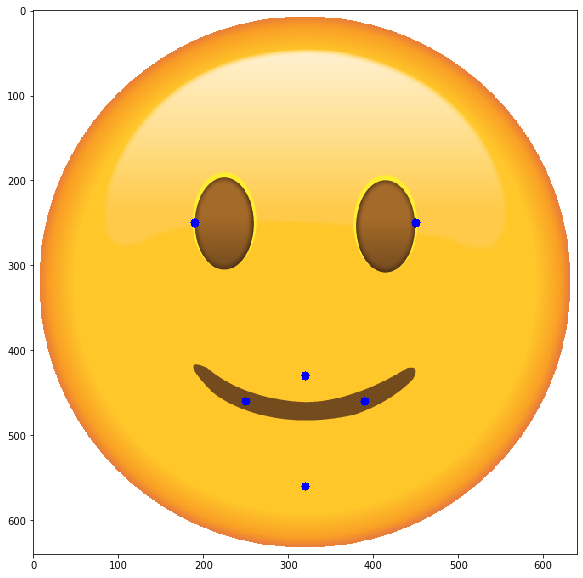

In [14]:
emoji = cv2.imread("./emojis/smile.png")
emoji = cv2.cvtColor(emoji, cv2.COLOR_BGR2RGB)

emoji_points = [
    (int(emoji.shape[0] / 2), 430), # renzhong
    (int(emoji.shape[0] / 2), 380 + 180), # chin
    (190, 250), # left eye
    (450, 250), # righteye
    (250, 460), # leftmouth
    (emoji.shape[0] - 250, 460) # rightmouth
]

for p in emoji_points:
    emoji = cv2.circle(emoji, p, 5, (0,0,255), -1)

emoji_points = np.array(emoji_points)
print(emoji_points)

plt.figure(figsize=(10, 10))
plt.imshow(emoji)

In [4]:
def circle_mask(n, diff):
    a = n//2
    b = n//2
    r = n//2 - diff

    y,x = np.ogrid[-a:n-a, -b:n-b]
    circle_mask = x*x + y*y <= r*r

    array = np.ones((n, n))
    array[circle_mask] = 255

    return array

In [5]:
image_points = np.array([
                            (shape0[51, :]),     # ren zhong
                            (shape0[8,  :]),     # Chin
                            (shape0[36, :]),     # Left eye left corner
                            (shape0[45, :]),     # Right eye right corne
                            (shape0[48, :]),     # Left Mouth corner
                            (shape0[54, :])      # Right mouth corner
                        ], dtype="double")

homography, stats = cv2.findHomography(emoji_points, image_points)

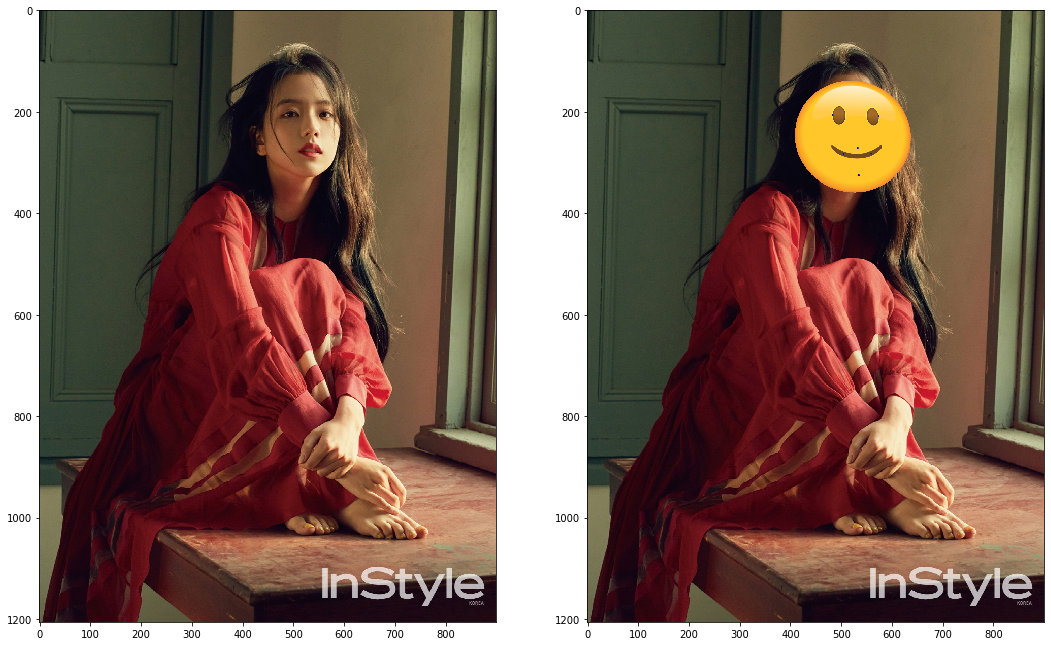

In [29]:
# warped = cv2.warpPerspective(emoji, homography, (gray.shape[1], gray.shape[0]))
warped_circle = cv2.warpPerspective(circle_mask(emoji.shape[0], 10), homography, (gray.shape[1], gray.shape[0]))
warped_circle[warped_circle>100]=255.0
warped_circle[warped_circle<=100]=0
warped_circle = -1 * (warped_circle - 255)
mask_warped = np.stack([warped_circle] * 3, axis=2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 18))
ax1.imshow(im)
ax2.imshow(np.where(mask_warped, im, warped))